## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#데이터 로드
df1 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv',encoding='euc_kr')
df2 = pd.read_csv('./data/자동차리콜현황(2021).csv',encoding='euc_kr')
df3 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')

In [35]:
# 데이터 병합
df = pd.concat([df1,df2,df3], axis=0)
df

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [46]:
# 데이터 중복 여부 및 개수 확인
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
1116,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1120,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1521,비엠더블유코리아(주),BMW 320d,2016-06-20,2020-07-31,2021-11-01,BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생...
...,...,...,...,...,...,...
790,비엠더블유코리아(주),530d,2016-10-27,2018-09-05,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [47]:
# 데이터 중복 제거한 후 결과 값 출력
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 4656
After: 4498


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4498 non-null   object
 1   차명        4498 non-null   object
 2   생산기간(부터)  4498 non-null   object
 3   생산기간(까지)  4498 non-null   object
 4   리콜개시일     4498 non-null   object
 5   리콜사유      4498 non-null   object
dtypes: object(6)
memory usage: 246.0+ KB


In [50]:
df.groupby('제작자').count()

,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
제작자,,,,,
(유)기흥모터스,21,21,21,21,21
(주) 다빈월드,1,1,1,1,1
(주) 바이크코리아,17,17,17,17,17
(주) 한국모터트레이딩,23,23,23,23,23
(주)다산중공업,2,2,2,2,2
(주)볼보자동차코리아,78,78,78,78,78
(주)스즈키씨엠씨,5,5,5,5,5
(주)스포츠모터사이클코리아,8,8,8,8,8
(주)에이비케이,2,2,2,2,2


In [51]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


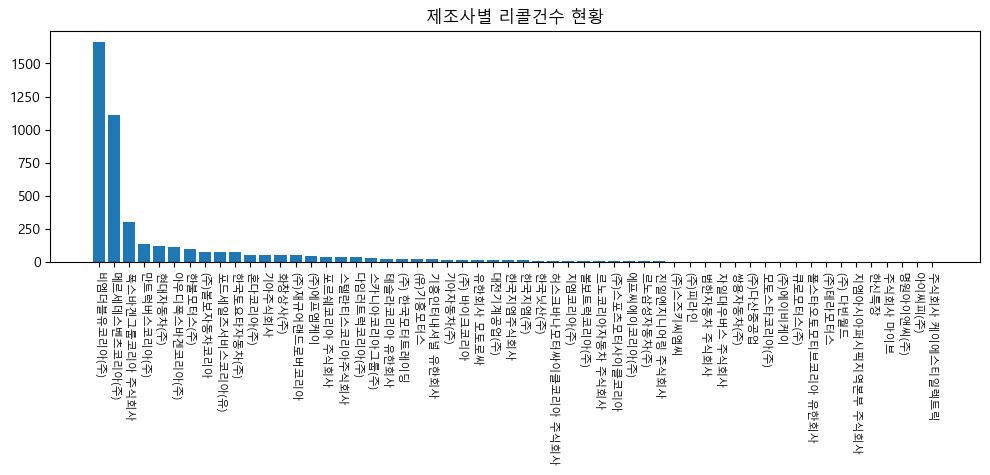

In [60]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = './NanumGothic.ttf' # 폰트 위치
# plt.rc('font', family=font_name)

plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp.index
y = tmp['count']

plt.figure(figsize=(12,3))   #스케치북 그리고
plt.bar(x=x,height=y)       #bar 차트에 x, y 값 할당
plt.xticks(fontsize=8,rotation=270)    #x축 이름 회전
plt.title('제조사별 리콜건수 현황') # 차트 제목 쓰고
plt.show()                  # 출력하라

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주) 기업이 가장 많은 리콜건수가 많다
```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [128]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
df['사용기간'] = (df['리콜개시일'].dt.year - df['생산기간(까지)'].dt.year) * 365 + df['리콜개시일'].dt.day - df['생산기간(까지)'].dt.day
df

C:\Users\user\AppData\Local\Temp\ipykernel_15900\549501816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['사용기간'] = (df['리콜개시일'].dt.year - df['생산기간(까지)'].dt.year) * 365 + df['리콜개시일'].dt.day - df['생산기간(까지)'].dt.day


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,종료_년,리콜_년,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2016,2020,1468
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2016,2020,1469
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,2020,357
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,2020,382
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,2020,384
...,...,...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2022,2022,2
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2022,2022,2
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,2022,2022,-2
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,2020,2022,754


In [129]:
df.drop(columns=['종료_년','리콜_년'])

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1468
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1469
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",357
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",382
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",384
...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,-2
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,754


In [130]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
tmp = df.groupby('제작자')['사용기간'].agg('mean').sort_values(ascending=False).to_frame('count')
tmp

,count
제작자,
한신특장,3256.000000
한국닛산(주),2448.000000
비엠더블유코리아(주),1993.363253
아이씨피(주),1808.000000
(주)다산중공업,1618.000000
한국지엠주식회사,1514.666667
(주)에프엠케이,1497.733333
진일엔지니어링 주식회사,1211.500000
쌍용자동차(주),1107.333333


In [131]:
# 사용기간 가장 긴 top10 추출
tmp1 = df.groupby('제작자')['사용기간'].agg('mean').sort_values(ascending=False).to_frame('count').head(10)
tmp1

,count
제작자,
한신특장,3256.000000
한국닛산(주),2448.000000
비엠더블유코리아(주),1993.363253
아이씨피(주),1808.000000
(주)다산중공업,1618.000000
한국지엠주식회사,1514.666667
(주)에프엠케이,1497.733333
진일엔지니어링 주식회사,1211.500000
쌍용자동차(주),1107.333333


In [132]:
# 사용기간 가장 짧은 top10 추출
tmp2 = df.groupby('제작자')['사용기간'].agg('mean').sort_values(ascending=False).to_frame('count').tail(10)
tmp2

,count
제작자,
(주)피라인,370.000000
주식회사 케이에스티일렉트릭,357.000000
테슬라코리아 유한회사,328.307692
(주)스포츠모터사이클코리아,321.500000
볼보트럭코리아(주),286.800000
(주) 바이크코리아,256.529412
대전기계공업(주),226.750000
(유)기흥모터스,149.714286
명원아이앤씨(주),6.000000


In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

<Figure size 800x400 with 0 Axes>

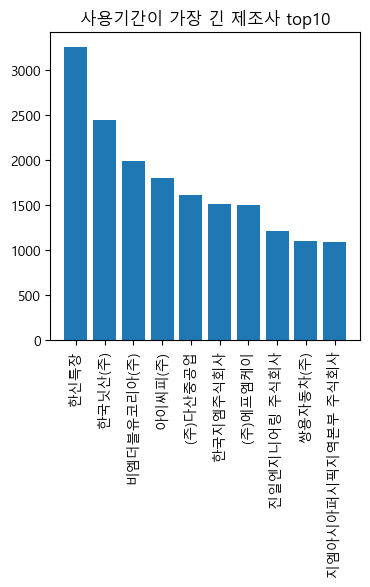

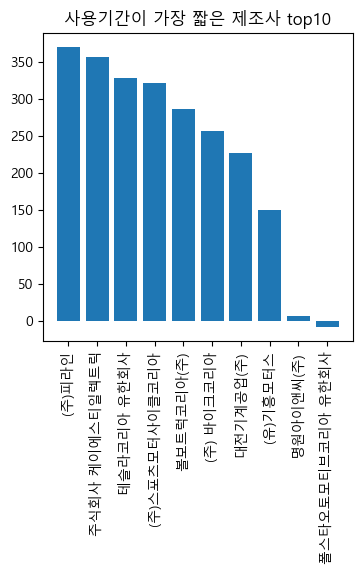

In [141]:
x = tmp1.index
y = tmp1['count']

plt.figure(figsize=(4,4))   #스케치북 그리고
plt.bar(x=x,height=y)       #bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    #x축 이름 회전
plt.title('사용기간이 가장 긴 제조사 top10') # 차트 제목 쓰고
plt.show()                  # 출력하라

x = tmp2.index
y = tmp2['count']

plt.figure(figsize=(4,4))   #스케치북 그리고
plt.bar(x=x,height=y)       #bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    #x축 이름 회전
plt.title('사용기간이 가장 짧은 제조사 top10') # 차트 제목 쓰고
plt.show()                  # 출력하라

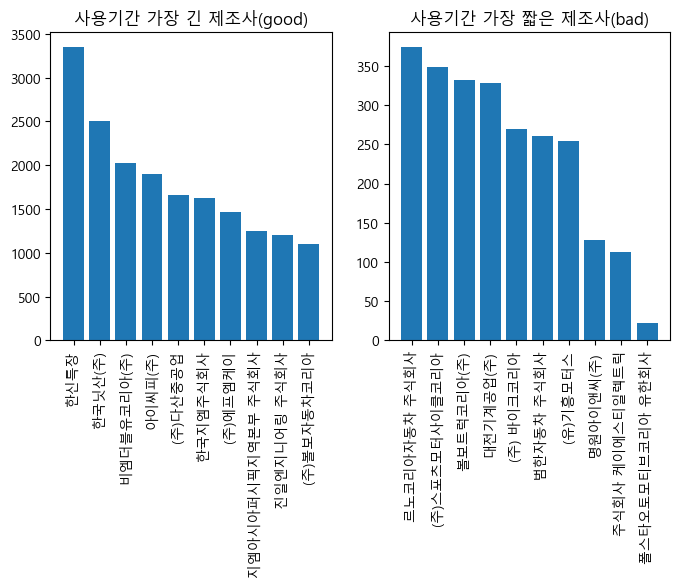

```
문제:그나마 튼튼 제조사 top 3는?
답: 한신특장, 한국닛산(주), 비엠더블유코리아(주)
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [ ]:
# 리콜건수가 가장 많은 제조사는?


In [ ]:
# 리콜 사유는?



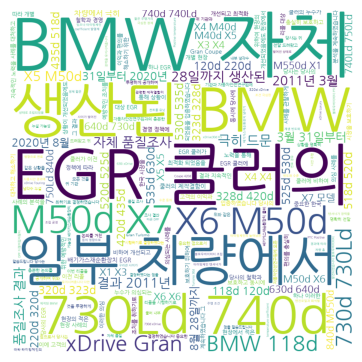

In [83]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = result['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [ ]:
# 주요 원인이 포함된 이유 상세 보기


In [ ]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?


```
리콜 주요 원인은? 

그래서, 가장 나쁜 모델은? 

```